# Time Series:

## Imorting Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Reading And Understanding Data:

In [2]:
df = pd.read_csv('airline-passenger-traffic.csv',header=None)

In [3]:
df.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.shape

(144, 2)

In [5]:
df.describe()

,1
count,140.000000
mean,280.735714
std,120.593235
min,104.000000
25%,180.000000
50%,268.000000
75%,360.500000
max,622.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       144 non-null    object 
 1   1       140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.dtypes

0     object
1    float64
dtype: object

In [8]:
df.columns = ['Months','Passengers']

In [9]:
df.head()

,Months,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


## Converting into date time series:

In [10]:
df['Months'] = pd.to_datetime(df['Months'],format='%Y-%m')

In [11]:
df.head()

,Months,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
df.dtypes

Months        datetime64[ns]
Passengers           float64
dtype: object

In [13]:
df = df.set_index('Months')

In [14]:
df.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Time Series Analysis:

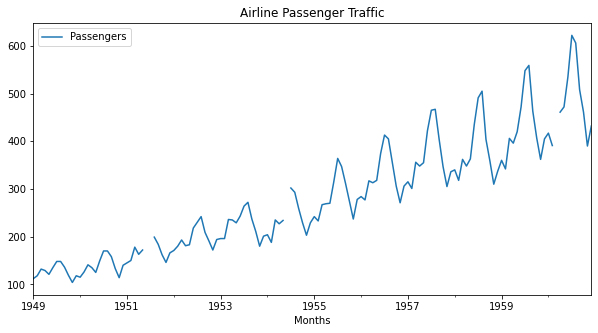

In [15]:
# plottig time series data:

df.plot(figsize=(10,5))
plt.title('Airline Passenger Traffic')
plt.show()

## Missing Value Treatment:

In [16]:
# treating missing value with linear interpolation:

In [17]:
df1 = pd.read_csv('airline-passenger-traffic.csv',header=None)
df1.columns = ['Months','Passengers']


In [18]:
df1.dtypes

Months         object
Passengers    float64
dtype: object

In [19]:
# changing format of dtypes

df1['Months'] = pd.to_datetime(df1['Months'],format='%Y-%m')

In [20]:
df1.dtypes

Months        datetime64[ns]
Passengers           float64
dtype: object

In [21]:
df1 = df1.set_index(['Months'])

In [22]:
df1.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


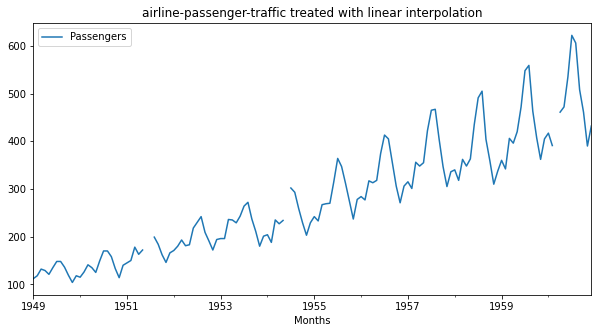

In [23]:
df1.plot(figsize=(10,5))
plt.title('airline-passenger-traffic treated with linear interpolation')
plt.show()

In [24]:
df1.isnull().sum()

Passengers    4
dtype: int64

In [25]:
df1['Passengers'].fillna(df1['Passengers'].interpolate(method='linear'),inplace=True)

In [26]:
df1.isnull().sum()

Passengers    0
dtype: int64

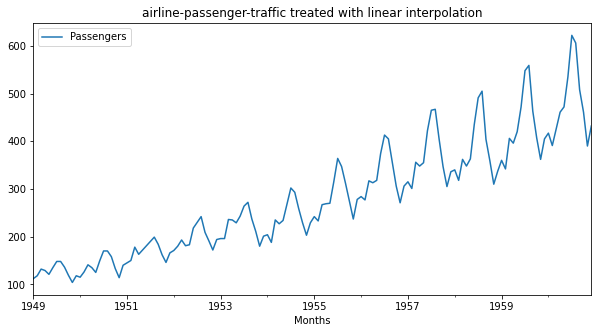

In [27]:
df1.plot(figsize=(10,5))
plt.title('airline-passenger-traffic treated with linear interpolation')
plt.show()

## Outliers detection:

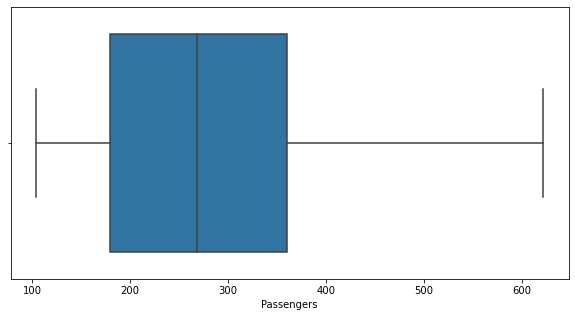

In [28]:
# boxplot:

plot=plt.subplots(figsize=(10,5))
box_plot = sns.boxplot(x=df['Passengers'],whis=1.5)

## Time Series Decomposition:

In [29]:
# additive:

In [30]:
from statsmodels.api import tsa

<Figure size 720x360 with 0 Axes>

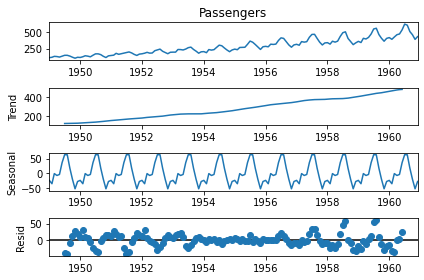

In [31]:
plt.figure(figsize=(10,5))
dc = tsa.seasonal_decompose(df1['Passengers'], model='additive')
dc.plot()
plt.show()

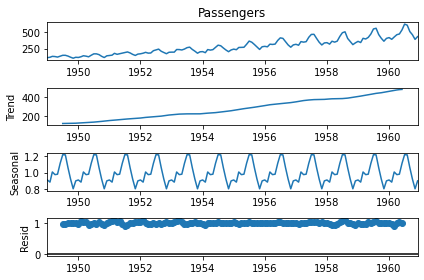

In [32]:
# multiplicative:

dc = tsa.seasonal_decompose(df1['Passengers'],model= 'multplicative')
dc.plot()
plt.show()

## splitting time series:

In [33]:
train_len = 120
train = df1[0:train_len]
test=df1[train_len:]

## using naive method:

In [34]:
y_pred = train['Passengers'][train_len-1]
y_pred

337.0

In [35]:
# adding new column to df1 set:

train['y_pred']=y_pred

<ipython-input-35-007e46b39462>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_pred']=y_pred


In [36]:
train.head()

,Passengers,y_pred
Months,,
1949-01-01,112.0,337.0
1949-02-01,118.0,337.0
1949-03-01,132.0,337.0
1949-04-01,129.0,337.0
1949-05-01,121.0,337.0


# calculating RMSE and MAPE:

In [37]:
# RMSE:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train['Passengers'],train['y_pred'])
mse

17245.341666666667

In [38]:
rmse = np.sqrt(mse)
rmse

131.32152019629785

In [39]:
# upto 2 decimal point:

rmse = rmse.round(2)
rmse

131.32

In [40]:
# MAPE:

error = train['Passengers']-train['y_pred']
abs_error = np.abs(error)

In [41]:
per_abs_error = (abs_error/train['Passengers'])*100

In [42]:
mape = np.mean(per_abs_error)
mape=np.round(mape,2)
mape

64.26

## simple average method:

In [43]:
train['y_pred_sa'] = train['Passengers'].mean()
train['y_pred_sa']

<ipython-input-43-de08b13af8df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_pred_sa'] = train['Passengers'].mean()


Months
1949-01-01    245.891667
1949-02-01    245.891667
1949-03-01    245.891667
1949-04-01    245.891667
1949-05-01    245.891667
                 ...    
1958-08-01    245.891667
1958-09-01    245.891667
1958-10-01    245.891667
1958-11-01    245.891667
1958-12-01    245.891667
Name: y_pred_sa, Length: 120, dtype: float64

## Simplpe moving averge method:

In [44]:
# predicted rolling window:

ma_window = 12

In [45]:
# calculating:

train['y_pred_sma'] = train['Passengers'].rolling(ma_window).mean()

<ipython-input-45-c65be43ec1ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_pred_sma'] = train['Passengers'].rolling(ma_window).mean()


In [46]:
train['y_pred_sma']

Months
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
Name: y_pred_sma, Length: 120, dtype: float64

In [47]:
train

,Passengers,y_pred,y_pred_sa,y_pred_sma
Months,,,,
1949-01-01,112.0,337.0,245.891667,NaN
1949-02-01,118.0,337.0,245.891667,NaN
1949-03-01,132.0,337.0,245.891667,NaN
1949-04-01,129.0,337.0,245.891667,NaN
1949-05-01,121.0,337.0,245.891667,NaN
...,...,...,...,...
1958-08-01,505.0,337.0,245.891667,379.500000
1958-09-01,404.0,337.0,245.891667,379.500000
1958-10-01,359.0,337.0,245.891667,380.500000
